# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [304]:
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

with zipfile.ZipFile("../data/GlobalLandTemperaturesByMajorCity.csv.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [305]:
weather_df = df[df["dt"] >= "1850-01-01"]
weather_df.head(50)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,5.63N,3.23W
13,1850-02-01,27.890,1.430,Abidjan,Côte D'Ivoire,5.63N,3.23W
14,1850-03-01,27.852,2.173,Abidjan,Côte D'Ivoire,5.63N,3.23W
15,1850-04-01,26.547,1.662,Abidjan,Côte D'Ivoire,5.63N,3.23W
16,1850-05-01,25.379,1.355,Abidjan,Côte D'Ivoire,5.63N,3.23W
17,1850-06-01,24.903,1.178,Abidjan,Côte D'Ivoire,5.63N,3.23W
18,1850-07-01,24.040,1.301,Abidjan,Côte D'Ivoire,5.63N,3.23W
19,1850-08-01,23.758,1.282,Abidjan,Côte D'Ivoire,5.63N,3.23W
20,1850-09-01,24.000,1.220,Abidjan,Côte D'Ivoire,5.63N,3.23W
21,1850-10-01,24.491,1.178,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

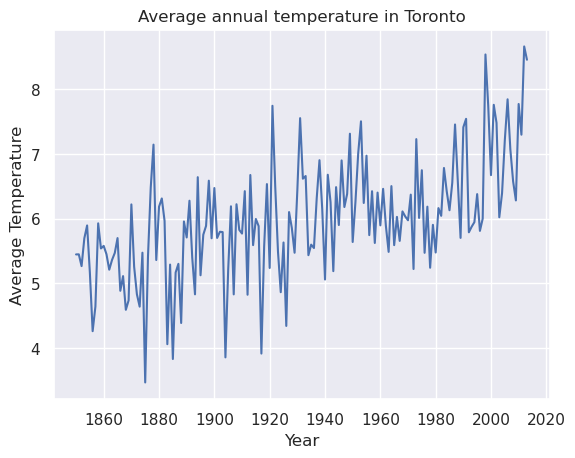

In [306]:
toronto_df = weather_df[weather_df["City"] == "Toronto"]
toronto_average_annual_temperature = toronto_df.groupby(toronto_df.dt.dt.year)["AverageTemperature"].mean()

plt.plot(toronto_average_annual_temperature)
plt.title("Average annual temperature in Toronto")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [307]:
temp_variance = weather_df.groupby(["City", "Latitude"]).agg(TemperatureVariance=("AverageTemperature", np.var))
temp_variance["TemperatureVariance"].idxmax()

('Harbin', '45.81N')

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [308]:
temp_variance = temp_variance.reset_index()

def mean_year_month_temp(year: int = 1975, month: int = 1):
    date = weather_df[(weather_df.dt.dt.year==year) & (weather_df.dt.dt.month==month)]
    mean_temp_in_month = date.groupby(["City", "Latitude"]).agg(MeanTemperature=("AverageTemperature", np.mean)).reset_index()
    return mean_temp_in_month

mean_temp_january_1975 = mean_year_month_temp(year=1975, month=1)
mean_temp_july_1975 = mean_year_month_temp(year=1975, month=7)

In [309]:
df_for_plot = temp_variance
df_for_plot["AverageTemperatureInJanuary1975"] = mean_temp_january_1975["MeanTemperature"]
df_for_plot["AverageTemperatureInJuly1975"] = mean_temp_july_1975["MeanTemperature"]
df_for_plot = df_for_plot.sort_values("Latitude")
df_for_plot.insert(2, "Side", df_for_plot["Latitude"].str[-1:])
df_for_plot["Latitude"] = df_for_plot["Latitude"].str[:-1]
df_for_plot = df_for_plot.sort_values(by=["Side", "Latitude"])
df_for_plot

,City,Latitude,Side,TemperatureVariance,AverageTemperatureInJanuary1975,AverageTemperatureInJuly1975
86,Singapore,0.80,N,0.535610,26.229,26.413
35,Ho Chi Minh City,10.45,N,1.424508,26.599,28.400
45,Kano,12.05,N,9.420183,18.939,25.843
7,Bangalore,12.05,N,3.394040,22.552,24.124
57,Madras,13.66,N,8.151719,24.012,30.048
...,...,...,...,...,...,...
30,Fortaleza,4.02,S,1.393426,27.234,26.007
41,Jakarta,5.63,S,0.412816,26.553,26.558
25,Dar Es Salaam,7.23,S,2.493574,27.477,24.132
87,Surabaya,7.23,S,0.518389,26.551,26.907


<AxesSubplot:xlabel='Latitude', ylabel='Temperature'>

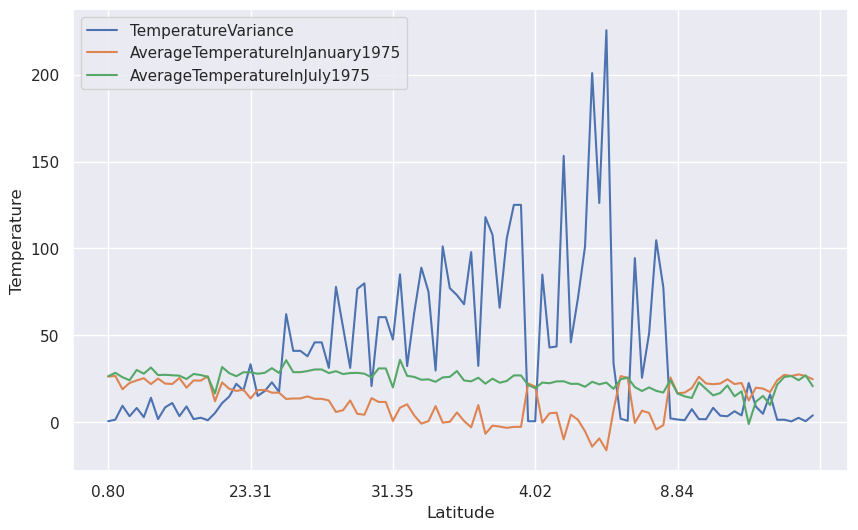

In [310]:
df_for_plot.plot(x="Latitude", 
                 y=["TemperatureVariance", "AverageTemperatureInJanuary1975", "AverageTemperatureInJuly1975"], 
                 figsize=(10,6),
                 ylabel="Temperature"
                 )

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество дней с отрицательной температурой в году.

1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

In [332]:
average_annual_temperature = weather_df.groupby(["City", weather_df["dt"].dt.year]).agg(AverageAnnualTemperature=("AverageTemperature", np.mean)).reset_index()

min_max_annual_temp = average_annual_temperature.groupby(["City"]).agg(MaxAnnualTemperature=("AverageAnnualTemperature", np.max),
                                                                       MinAnnualTemperature=("AverageAnnualTemperature", np.min))

min_max_annual_temp["DifferenceTemperature"] = min_max_annual_temp["MaxAnnualTemperature"] - min_max_annual_temp["MinAnnualTemperature"] 

print(min_max_annual_temp["DifferenceTemperature"].max()) 
print(min_max_annual_temp["DifferenceTemperature"].idxmax())

6.4005833333333335
Calcutta


2. Самая большая средняя разница между средней температурой января и средней температурой июля.

In [333]:
def mean_month_temp(month: int = 1):
    date = weather_df[weather_df.dt.dt.month==month]
    mean_temp_in_month = date.groupby(["City"]).agg(MeanTemperature=("AverageTemperature", np.mean))
    return mean_temp_in_month

df_january = mean_month_temp(month=1)
df_july = mean_month_temp(month=7)

df_january["DifferenceTemperature"] = np.abs(df_july["MeanTemperature"] - df_january["MeanTemperature"])

print(df_january["DifferenceTemperature"].max())
print(df_january["DifferenceTemperature"].idxmax())

42.88770731707317
Harbin


Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [349]:
temperature_below_zero = weather_df.groupby(["City", weather_df["dt"].dt.year])["AverageTemperature"].apply(lambda x: (x < 0).sum()).reset_index(name="count")
mean_month_count = temperature_below_zero.groupby(["City"]).agg(MeanMonthCount=("count", np.mean))

print(mean_month_count["MeanMonthCount"].max())
print(mean_month_count["MeanMonthCount"].idxmax())

4.963414634146342
Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 